In [ ]:
import numpy as np
import matplotlib.pyplot as plt

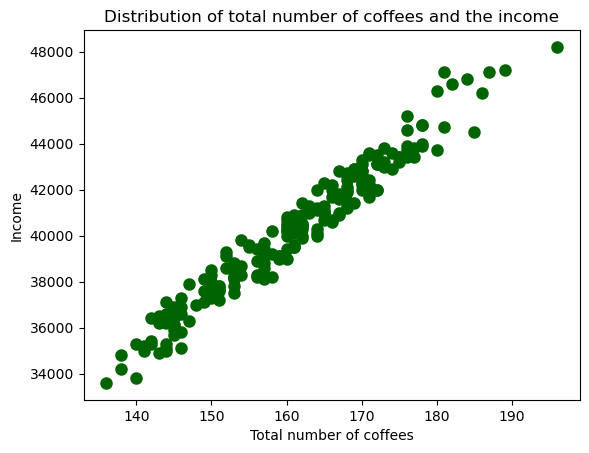

Correlation: 0.9775063308055291


In [ ]:
# Generate random data
small = np.random.poisson(lam=80, size=200)
large = np.random.poisson(lam=80, size=200)

# Calculate income and total
income = 200 * small + 300 * large
total = small + large

# Plot the data
plt.scatter(total, income, color="darkgreen", linewidth=3)
plt.title("Distribution of total number of coffees and the income")
plt.xlabel("Total number of coffees")
plt.ylabel("Income")
plt.show()

# Calculate correlation
correlation = np.corrcoef(total, income)[0, 1]
print("Correlation:", correlation)

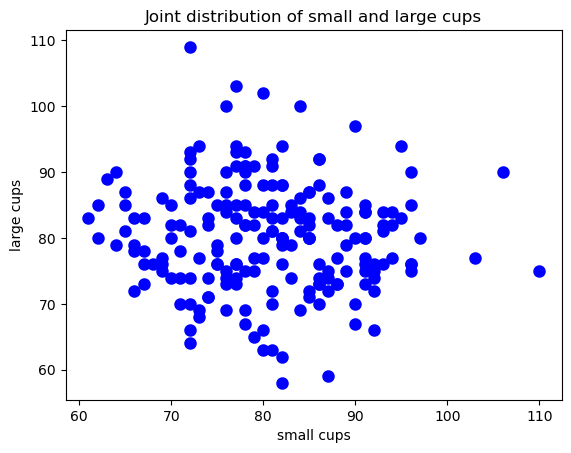

Correlation between small and large: -0.06271736043625788


In [2]:
# Scatter plot of large vs small
plt.scatter(small, large, color="blue", linewidth=3)
plt.title("Joint distribution of small and large cups")
plt.xlabel("small cups")
plt.ylabel("large cups")
plt.show()

# Calculate correlation
correlation_small_large = np.corrcoef(small, large)[0, 1]
print("Correlation between small and large:", correlation_small_large)

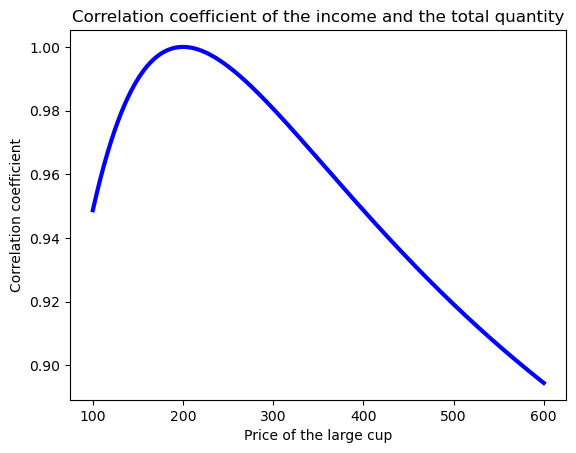

In [3]:

# Define the function
def correlation_coefficient(x):
    return (200 + x) / np.sqrt(80000 + 2 * x**2)

# Generate x values
x = np.linspace(100, 600, 500)

# Calculate y values
y = correlation_coefficient(x)

# Plot the curve
plt.plot(x, y, linewidth=3, color="blue")
plt.title("Correlation coefficient of the income and the total quantity")
plt.xlabel("Price of the large cup")
plt.ylabel("Correlation coefficient")
plt.show()

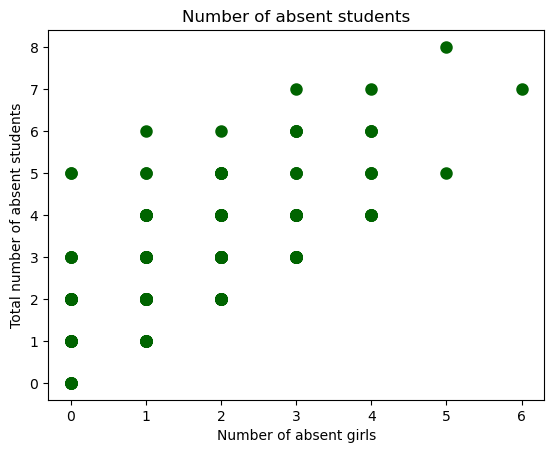

Correlation: 0.6714570459737852


In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Generate random data
boys = np.random.binomial(n=15, p=0.1, size=200)
girls = np.random.binomial(n=18, p=0.1, size=200)

# Calculate total
total = boys + girls

# Plot the data
plt.scatter(girls, total, color="darkgreen", linewidth=3)
plt.title("Number of absent students")
plt.xlabel("Number of absent girls")
plt.ylabel("Total number of absent students")
plt.show()

# Calculate correlation
correlation = np.corrcoef(girls, total)[0, 1]
print("Correlation:", correlation)

(0.0, 2.0)

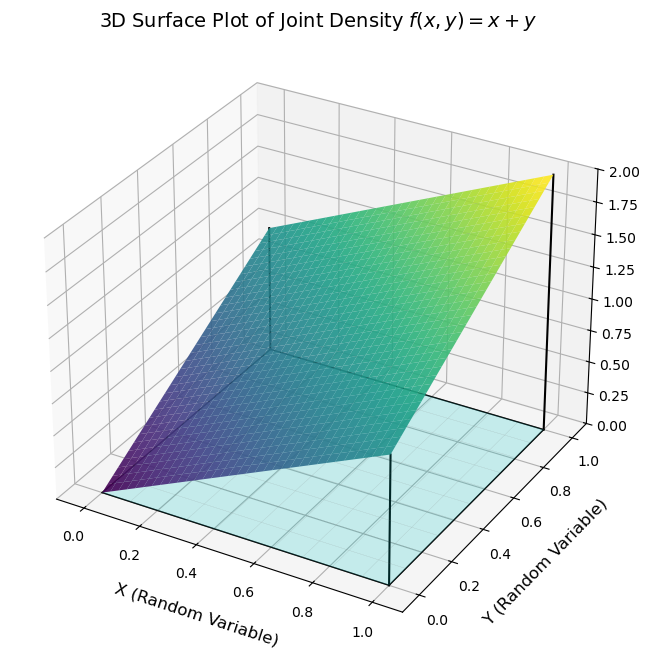

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Function Definition ---
def joint_density_function(x, y):
    """
    Computes the joint density f(x, y) = x + y for 0 <= x <= 1 and 0 <= y <= 1.
    For demonstration purposes, this function assumes x and y are within the domain.
    """
    return x + y

# --- Data Generation ---

# 1. Create a grid of x and y values from 0 to 1
# We use np.linspace to get 100 points for a smooth surface.
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# 2. Create the mesh grid for 3D plotting
# X and Y are 2D arrays where X[i, j] = x[j] and Y[i, j] = y[i]
X, Y = np.meshgrid(x, y)

# 3. Compute the Z values (the density f(x, y)) for every point on the grid
Z = joint_density_function(X, Y)

# --- 3D Plotting ---

# 1. Create a figure and a 3D axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 2. Plot the surface (The top of the volume)
# cmap (colormap) is set to 'viridis' for good contrast.
surface = ax.plot_surface(X, Y, Z,
                          cmap='viridis',
                          edgecolor='none',
                          rstride=3,
                          cstride=3,
                          alpha=0.9)

# 2b. Plotting the integral volume boundaries to visualize the solid volume
Z_base = np.zeros_like(Z)

# Plot a solid, transparent base plane at z=0 to visualize the integration domain (the area below the surface)
ax.plot_surface(X, Y, Z_base,
                color='cyan',
                rstride=10,
                cstride=10,
                alpha=0.2,     # Highly transparent
                edgecolor='gray',
                linewidth=0.2)

# Plot the four vertical corner edges (walls) connecting the surface to the base
# f(x, y) = x + y
# (1, 0) to (1, 0, 1)
ax.plot([1, 1], [0, 0], [0, joint_density_function(1, 0)], color='k', linewidth=1.5)

# (0, 1) to (0, 1, 1)
ax.plot([0, 0], [1, 1], [0, joint_density_function(0, 1)], color='k', linewidth=1.5)

# (1, 1) to (1, 1, 2)
ax.plot([1, 1], [1, 1], [0, joint_density_function(1, 1)], color='k', linewidth=1.5)

# Also explicitly plot the four horizontal base edges for clarity
ax.plot(x, np.zeros_like(x), Z_base[0, :], color='k', linewidth=1) # Y=0 edge
ax.plot(x, np.ones_like(x), Z_base[-1, :], color='k', linewidth=1) # Y=1 edge
ax.plot(np.zeros_like(y), y, Z_base[:, 0], color='k', linewidth=1) # X=0 edge
ax.plot(np.ones_like(y), y, Z_base[:, -1], color='k', linewidth=1) # X=1 edge


# 3. Customize the plot labels and title
ax.set_xlabel('X (Random Variable)', fontsize=12, labelpad=10)
ax.set_ylabel('Y (Random Variable)', fontsize=12, labelpad=10)
ax.set_zlabel('f(x, y) (Joint Density)', fontsize=12, labelpad=10)
ax.set_title(r'3D Surface Plot of Joint Density $f(x, y) = x + y$', fontsize=14)

# 4. Set the limits for better visualization
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_zlim(0, 2) # Since max value is 1 + 1 = 2